# 📊 AI-Powered Churn Prevention Advisor  
*Week 1: Exploratory Data Analysis + Preprocessing*  

This notebook explores customer churn data and builds a preprocessing pipeline to prepare it for predictive modeling.  

**Objectives:**  
- Perform **EDA** to uncover churn drivers.  
- Handle **missing values** and encode categorical data.  
- Build a **Scikit-learn pipeline** for preprocessing.  
- Prepare a **train-test split** dataset for modeling in Week 2.  


In [108]:
# Load Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("churn_dataset.csv")
df.head()


,CustomerID,Gender,Age,Tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,JoinDate,LastInteraction,...,InternetService,OnlineSecurity,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,Region,IncomeGroup,FeedbackScore,ComplaintRaised
0,CUST8401,Female,57.0,66.0,Month-to-month,57.76,743.17,Credit Card,2019-07-15,2022-02-28,...,Fiber Optic,Yes,Yes,Yes,Yes,Yes,East,richhh,3,1
1,CUST6834,Male,19.0,33.0,Month-to-month,45.83,2232.50,Electronic Check,2016-12-09,2023-01-03,...,??,Yes,No,unknown,Yes,Yes,North,Medium,-1,Yes
2,CUST3122,Female,43.0,48.0,One year,40.53,2568.96,Bank Transfer,2015-01-06,2023-04-29,...,Fiber Optic,NaN,maybe,Yes,No,Yes,East,richhh,-1,No
3,CUST9788,Male,36.0,54.0,One year,51.00,3507.02,Credit Card,2020-10-31,2022-08-12,...,Fiber Optic,No,NaN,Yes,No,Yes,West,richhh,10,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📋 Dataset Overview


In [109]:
# Dataset info and summary
df.info()
df.describe(include="all").T.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        9800 non-null   object 
 1   Gender            9800 non-null   object 
 2   Age               9800 non-null   float64
 3   Tenure            9800 non-null   float64
 4   Contract          9800 non-null   object 
 5   MonthlyCharges    9800 non-null   float64
 6   TotalCharges      9800 non-null   float64
 7   PaymentMethod     9800 non-null   object 
 8   JoinDate          9800 non-null   object 
 9   LastInteraction   9800 non-null   object 
 10  Churn             9800 non-null   object 
 11  InternetService   7799 non-null   object 
 12  OnlineSecurity    4973 non-null   object 
 13  TechSupport       7393 non-null   object 
 14  DeviceProtection  9800 non-null   object 
 15  StreamingTV       9800 non-null   object 
 16  StreamingMovies   9800 non-null   object

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,9800,9800,CUST8401,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9800,3,Male,3290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,9800.0,NaN,NaN,NaN,48.377755,17.882215,18.0,33.0,48.0,64.0,79.0
Tenure,9800.0,NaN,NaN,NaN,35.275918,20.858075,0.0,17.0,35.0,53.0,71.0
Contract,9800,3,Month-to-month,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,9800.0,NaN,NaN,NaN,69.443903,28.757527,20.0,44.34,69.49,94.0925,119.98
TotalCharges,9800.0,NaN,NaN,NaN,3995.166221,2309.48483,20.13,1996.7375,3969.95,6027.625,7999.78
PaymentMethod,9800,4,Credit Card,2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JoinDate,9800,2495,2017-06-06,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastInteraction,9800,730,2022-10-18,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [110]:
#Checking Missing values in dataset
df.isnull().sum()

CustomerID           300
Gender               300
Age                  300
Tenure               300
Contract             300
MonthlyCharges       300
TotalCharges         300
PaymentMethod        300
JoinDate             300
LastInteraction      300
Churn                300
InternetService     2301
OnlineSecurity      5127
TechSupport         2707
DeviceProtection     300
StreamingTV          300
StreamingMovies      300
Region              2242
IncomeGroup          300
FeedbackScore        300
ComplaintRaised      300
dtype: int64

In [111]:
# Drop rows where target (Churn) is missing
df = df.dropna(subset=["Churn"])
df.shape

(9800, 21)

In [112]:
df.isnull().sum()

CustomerID             0
Gender                 0
Age                    0
Tenure                 0
Contract               0
MonthlyCharges         0
TotalCharges           0
PaymentMethod          0
JoinDate               0
LastInteraction        0
Churn                  0
InternetService     2001
OnlineSecurity      4827
TechSupport         2407
DeviceProtection       0
StreamingTV            0
StreamingMovies        0
Region              1942
IncomeGroup            0
FeedbackScore          0
ComplaintRaised        0
dtype: int64

In [113]:
# Fill categorical missing values with 'Unknown'
cat_cols = ['InternetService', 'OnlineSecurity', 'TechSupport', 'Region']
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

# Convert numeric-like columns to real numeric
num_cols = ['Age','Tenure','MonthlyCharges','TotalCharges','FeedbackScore']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert Total Charges Data types string to Numeric as well to run the code without error.
    df[col] = df[col].fillna(df[col].median()) # fill NaN with median


In [114]:
#final check for missing value
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
Tenure              0
Contract            0
MonthlyCharges      0
TotalCharges        0
PaymentMethod       0
JoinDate            0
LastInteraction     0
Churn               0
InternetService     0
OnlineSecurity      0
TechSupport         0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
Region              0
IncomeGroup         0
FeedbackScore       0
ComplaintRaised     0
dtype: int64

In [115]:
#Removing Duplicates
df.drop_duplicates(inplace=True)


In [116]:
#I found that the Complaint Raised columns have Yes No value as well as 0,1 value, so make it only Yes/No.
# Standardise ComplaintRaised column to 'Yes'/'No'
df['ComplaintRaised'] = df['ComplaintRaised'].replace({
    1: "Yes",
    0: "No",
    "1": "Yes",
    "0": "No"
})

# Double check unique values
print(df['ComplaintRaised'].unique())


['Yes' 'No']


## Feature Engineering 

In [117]:
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['LastInteraction'] = pd.to_datetime(df['LastInteraction'])
df['CustomerLifetime'] = (df['LastInteraction'] - df['JoinDate']).dt.days


In [118]:
df.head() #Last column will be CustomerLifeTime, we can see that duration of interaction.

,CustomerID,Gender,Age,Tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,JoinDate,LastInteraction,...,OnlineSecurity,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,Region,IncomeGroup,FeedbackScore,ComplaintRaised,CustomerLifetime
0,CUST8401,Female,57.0,66.0,Month-to-month,57.76,743.17,Credit Card,2019-07-15,2022-02-28,...,Yes,Yes,Yes,Yes,Yes,East,richhh,3.0,Yes,959
1,CUST6834,Male,19.0,33.0,Month-to-month,45.83,2232.50,Electronic Check,2016-12-09,2023-01-03,...,Yes,No,unknown,Yes,Yes,North,Medium,-1.0,Yes,2216
2,CUST3122,Female,43.0,48.0,One year,40.53,2568.96,Bank Transfer,2015-01-06,2023-04-29,...,Unknown,maybe,Yes,No,Yes,East,richhh,-1.0,No,3035
3,CUST9788,Male,36.0,54.0,One year,51.00,3507.02,Credit Card,2020-10-31,2022-08-12,...,No,Unknown,Yes,No,Yes,West,richhh,10.0,Yes,650
5,CUST3531,Female,32.0,37.0,Month-to-month,46.71,586.00,Mailed Check,2020-11-29,2022-09-16,...,Yes,No,unknown,Yes,No,North,Medium,3.0,Yes,656


In [119]:
#Encoding categorical Values
df = pd.get_dummies(df, drop_first=True)


In [120]:
#Scaling numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Age','Tenure','MonthlyCharges','TotalCharges','CustomerLifetime']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [121]:
df.to_csv("cleaned_churn_dataset.csv", index=False)

## Exploratory Data Analysis

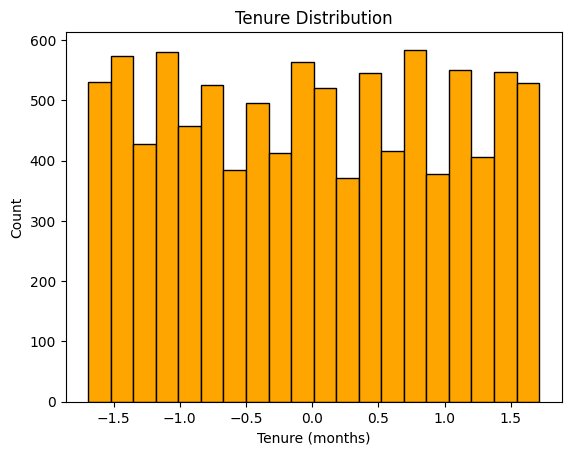

In [122]:
#Tenure Distribution
plt.hist(df["Tenure"], bins=20, color="orange", edgecolor="black")
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

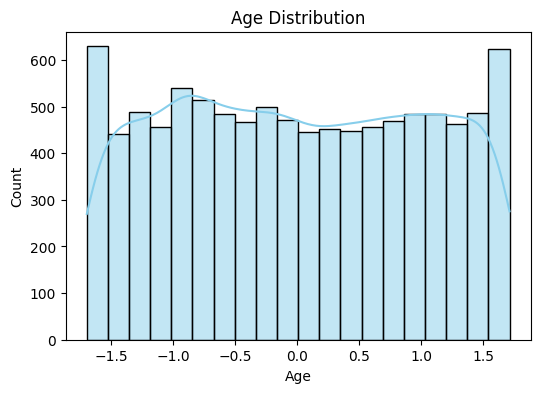

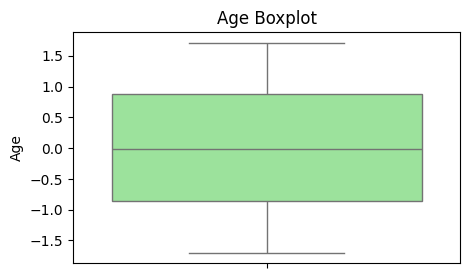

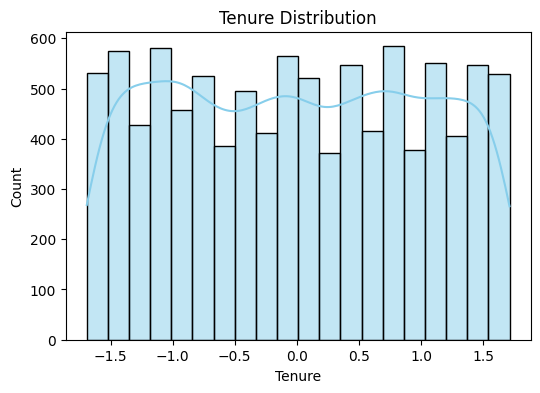

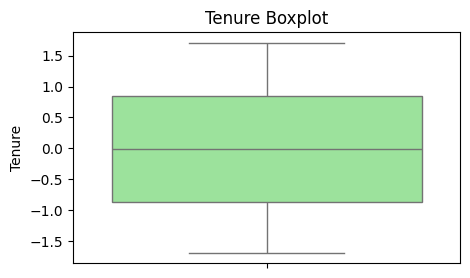

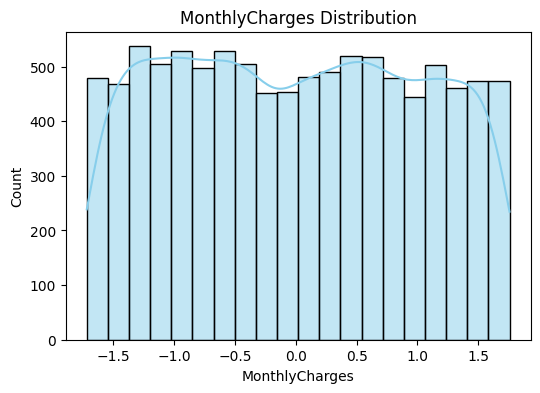

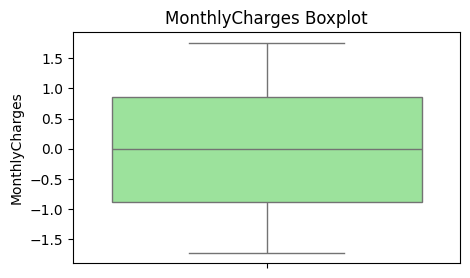

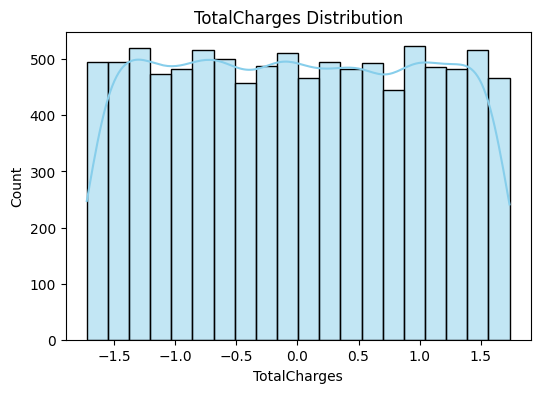

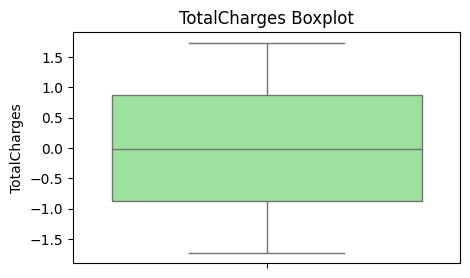

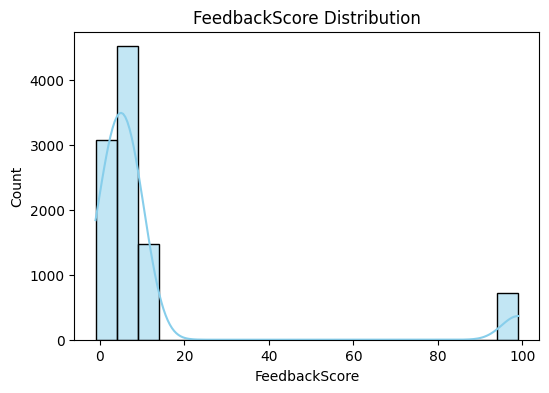

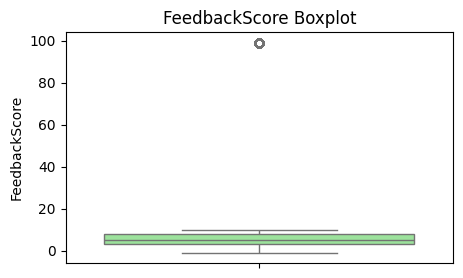

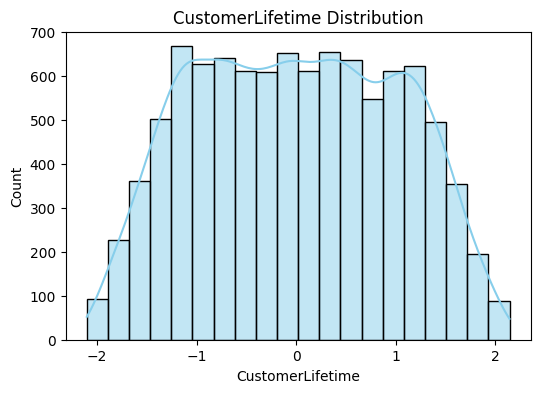

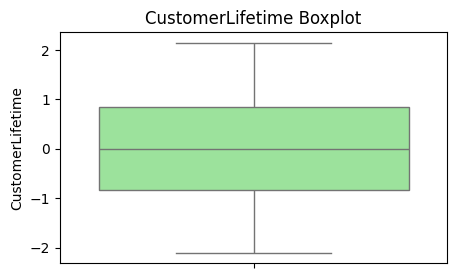

In [123]:
# Distribution Plots
num_cols = ['Age','Tenure','MonthlyCharges','TotalCharges','FeedbackScore','CustomerLifetime']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue")
    plt.title(f"{col} Distribution")
    plt.show()

    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"{col} Boxplot")
    plt.show()

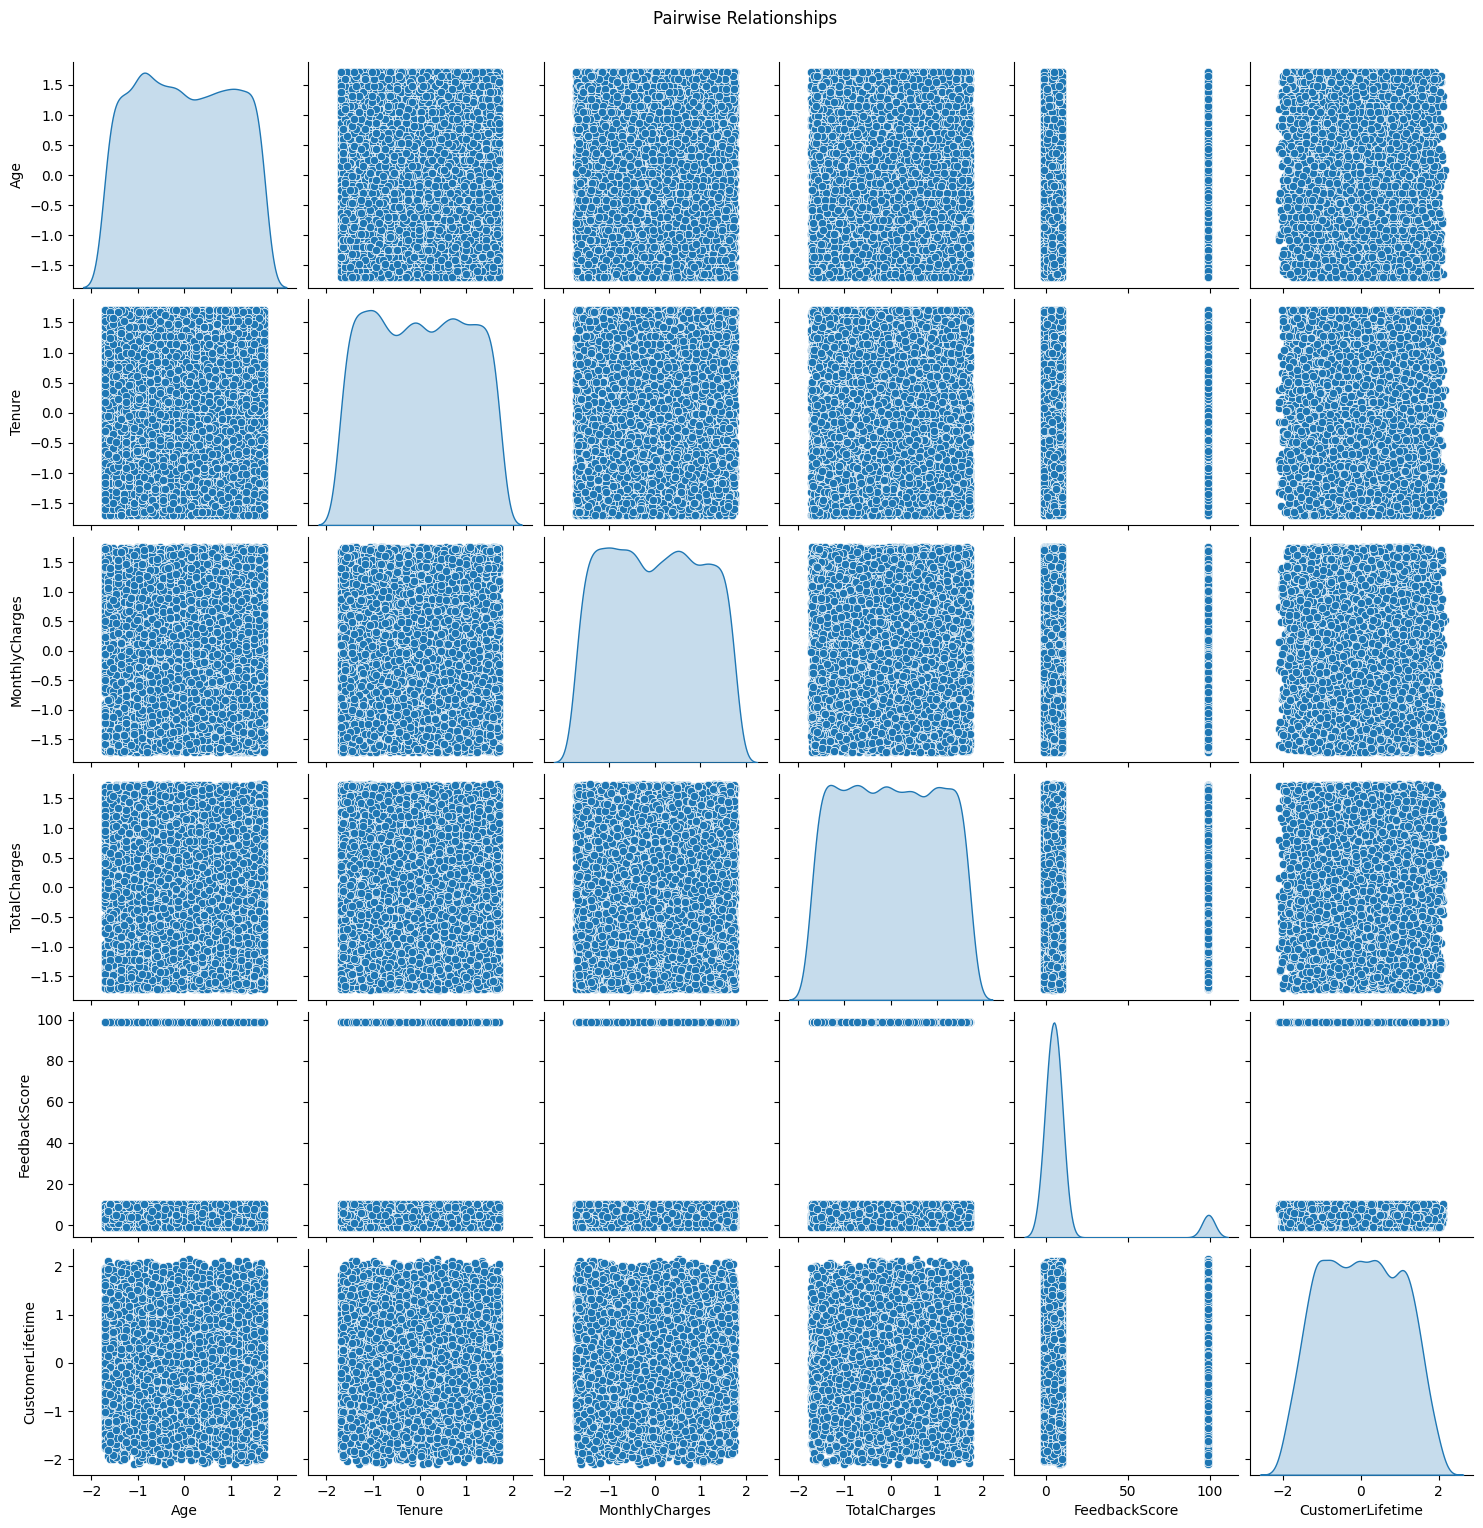

In [124]:
#Pairwise Relationships
sns.pairplot(df[num_cols], diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

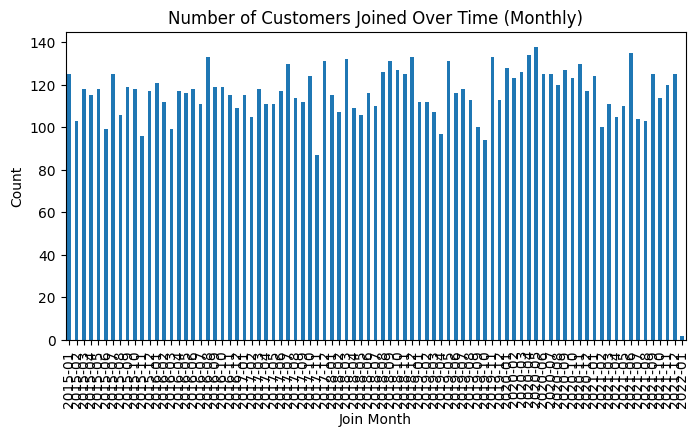

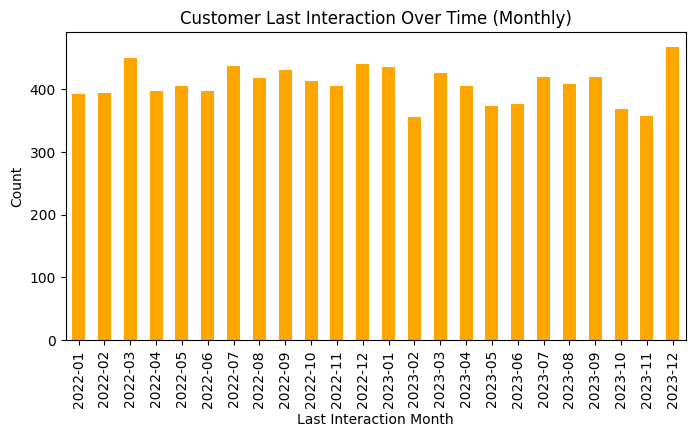

In [125]:
#Time Features (JoinDate & LastInteraction)
# Convert to datetime if not already
df["JoinDate"] = pd.to_datetime(df["JoinDate"], errors="coerce")
df["LastInteraction"] = pd.to_datetime(df["LastInteraction"], errors="coerce")

# Customers joined over time
plt.figure(figsize=(8,4))
df["JoinDate"].dt.to_period("M").value_counts().sort_index().plot(kind="bar")
plt.title("Number of Customers Joined Over Time (Monthly)")
plt.ylabel("Count")
plt.xlabel("Join Month")
plt.show()

# Last interactions over time
plt.figure(figsize=(8,4))
df["LastInteraction"].dt.to_period("M").value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Customer Last Interaction Over Time (Monthly)")
plt.ylabel("Count")
plt.xlabel("Last Interaction Month")
plt.show()

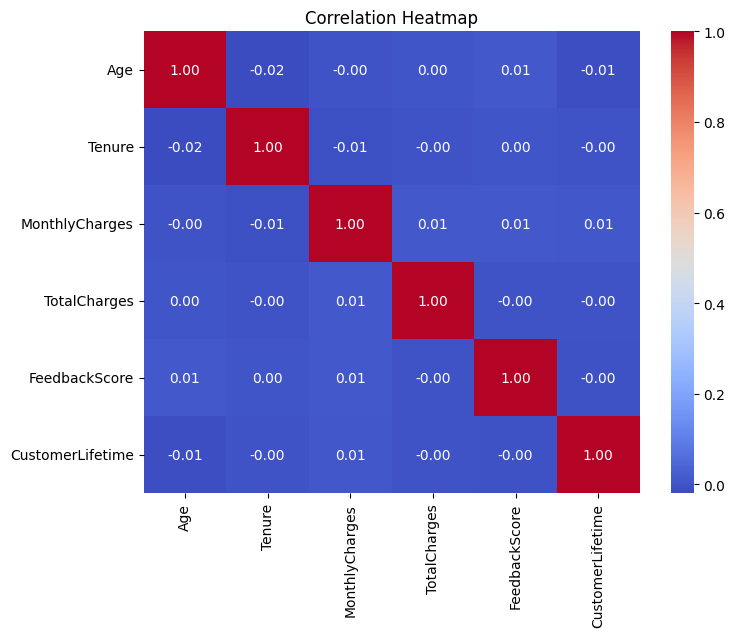

In [126]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

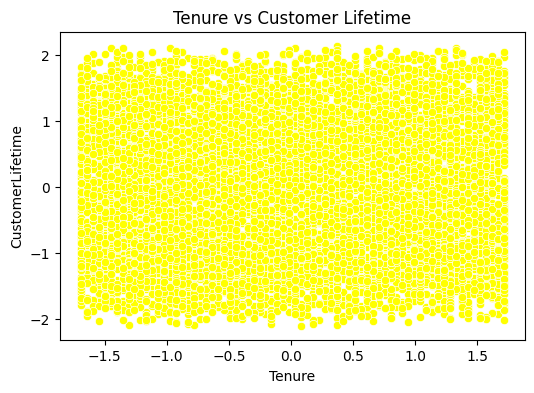

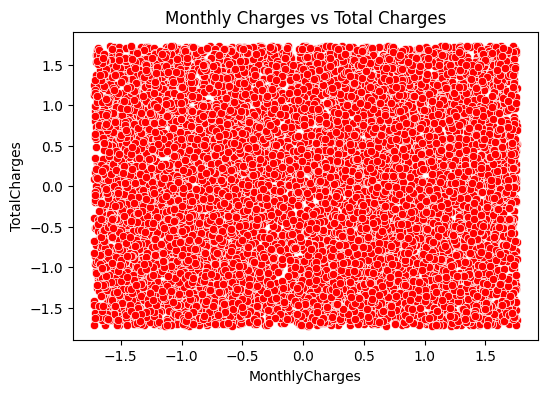

In [127]:
#Relationship with Lifetime

plt.figure(figsize=(6,4))
sns.scatterplot(x="Tenure", y="CustomerLifetime", data=df, color="yellow")
plt.title("Tenure vs Customer Lifetime")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=df, color="red")
plt.title("Monthly Charges vs Total Charges")
plt.show()

In [128]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


KeyError: "['Churn'] not found in axis"